# <font color='blue'>Module 9 - CCPS 844 Data Mining</font>

[Recursive feature elimination with cross-validation](#RFECV_ID)

[Principal component analysis (PCA)](#PCA_ID)

# <a id="RFECV_ID"><font color='blue'>Recursive feature elimination with cross-validation</font><a>

This topic can be further explored at: [RFE Details](https://www.scikit-yb.org/en/latest/api/features/rfecv.html)
    
Recursive feature elimination (RFE) is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached. Features are ranked by the model’s `coef_` or `feature_importances_` attributes, and by recursively eliminating a small number of features per loop, RFE attempts to eliminate dependencies and collinearity that may exist in the model.

RFE requires a specified number of features to keep, however it is often not known in advance how many features are valid. To find the optimal number of features cross-validation is used with RFE to score different feature subsets and select the best scoring collection of features. The `RFECV` visualizer plots the number of features in the model along with their cross-validated test score and variability and visualizes the selected number of features.

To show how this works in practice, we’ll start with a contrived example using a dataset that has only 3 informative features out of 25.

In [1]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
%matplotlib inline

**Build a classification task using 3 informative features and a total of 25 features**

In [2]:
X, y = make_classification(n_samples=1000, n_features=25, n_informative=6,
                           n_redundant=2, n_repeated=0, n_classes=8,
                           n_clusters_per_class=1, random_state=0)

**Create an object of logistic regression algorithm**

In [3]:
from sklearn.linear_model import LogisticRegression
logit=LogisticRegression(multi_class='ovr',solver='lbfgs')

**Create the RFE object and compute a cross-validated score.**

In [4]:
#In the multiclass case, the training algorithm uses the one-vs-rest (OvR) scheme 
#if the ‘multi_class’ option is set to ‘ovr’, and uses the cross-entropy loss if 
#the ‘multi_class’ option is set to ‘multinomial’. (Currently the ‘multinomial’ option 
#is supported only by the ‘lbfgs’, ‘sag’, ‘saga’ and ‘newton-cg’ solvers.)

# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=logit, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X, y)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                   fit_intercept=True, intercept_scaling=1,
                                   l1_ratio=None, max_iter=100,
                                   multi_class='ovr', n_jobs=None, penalty='l2',
                                   random_state=None, solver='lbfgs',
                                   tol=0.0001, verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

**Print optimal number of features using RFE Object**

In [5]:
print(f"Optimal number of features : {rfecv.n_features_}")

Optimal number of features : 6


**Plot number of features VS. accuracy score calculated from cross-validation**

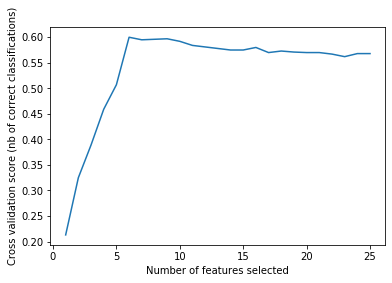

In [6]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

n_features_ : int
    The number of selected features with cross-validation.

support_ : array of shape [n_features]
    The mask of selected features.

ranking_ : array of shape [n_features]
    The feature ranking, such that `ranking_[i]`
    corresponds to the ranking
    position of the i-th feature.
    Selected (i.e., estimated best)
    features are assigned rank 1.

grid_scores_ : array of shape [n_subsets_of_features]
    The cross-validation scores such that
    ``grid_scores_[i]`` corresponds to
    the CV score of the i-th subset of features.

estimator_ : object

In [7]:
rfecv.n_features_

6

**Printing suppot which can be used to pick the best features**

In [8]:
rfecv.support_ 

array([False, False, False, False,  True, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True, False,  True, False, False,  True])

**Print ranking of each feature considering RFE object**

In [9]:
rfecv.ranking_

array([17, 10, 12, 15,  1,  8,  5,  1,  4, 18,  3,  7, 13, 11, 14,  1,  2,
       20,  9,  1, 19,  1,  6, 16,  1])

# <a id="PCA_ID"><font color='blue'>Principal component analysis (PCA)</font><a>
  
Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space.

### PCA Simple example

In [10]:
import numpy as np

X = np.array([[10, 20, 10],
 [ 2,  5,  2],
 [ 8, 17,  7],
 [ 9, 20, 10],
 [12, 22, 11]])

In [11]:
X

array([[10, 20, 10],
       [ 2,  5,  2],
       [ 8, 17,  7],
       [ 9, 20, 10],
       [12, 22, 11]])

In [12]:
from sklearn import decomposition

**Transform data considering 2 compenents**

In [13]:
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)

**Display the transformed data**

In [14]:
X

array([[-4.17288843e+00, -1.98923940e-04],
       [ 1.46146195e+01, -1.71937350e-01],
       [ 3.51842744e-01,  1.00363798e-01],
       [-3.73883152e+00,  8.99599868e-01],
       [-7.05474229e+00, -8.27827393e-01]])

In [15]:
X.shape

(5, 2)

# PCA example with Iris Data-set
Principal Component Analysis applied to the Iris dataset.
See `here <https://en.wikipedia.org/wiki/Iris_flower_data_set>`_ for more
information on this dataset.

Shape of the original data set (150, 4)


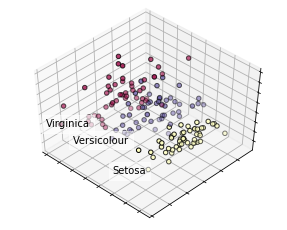

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
print("Shape of the original data set",X.shape)
y = iris.target

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap="Spectral",
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

## PCA example to show selecting important components

In [17]:
# Build a dataset using 3 informative features
X_PCA, y_PCA = make_classification(n_samples=1000, n_features=23, n_informative=13,
                           n_redundant=2, n_repeated=0, n_classes=2,
                           n_clusters_per_class=1, random_state=0)

In [18]:
X_PCA[0].shape

(23,)

In [19]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
pca_Object = PCA(n_components=23)
pca_Object.fit(X_PCA)

PCA(copy=True, iterated_power='auto', n_components=23, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [21]:
#The amount of variance that each PC explains
var_Data= pca_Object.explained_variance_ratio_
#Cumulative Variance explains
var1_Data=np.cumsum(np.round(pca_Object.explained_variance_ratio_, decimals=4)*100)

**Showing the cumulative variance captured by adding additional principal components (e.g. 1st PC, 1st + 2nd PC, etc.)**

In [22]:
var1_Data

array([ 35.38,  52.28,  60.13,  66.24,  71.36,  75.91,  80.01,  83.62,
        86.19,  88.4 ,  90.15,  91.61,  92.66,  93.7 ,  94.7 ,  95.69,
        96.62,  97.54,  98.39,  99.21, 100.  , 100.  , 100.  ])

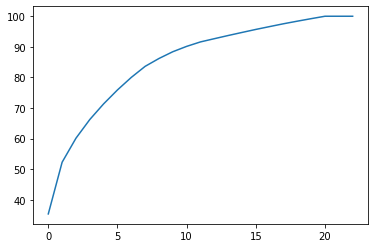

In [23]:
plt.plot(var1_Data)
plt.show()

**Selecting features that contain 90% of the variance**

In [24]:
pcaOBJ = decomposition.PCA(n_components=11)
pcaOBJ.fit(X_PCA)
obj = pcaOBJ.transform(X_PCA)
print("obj shape: ",obj.shape)
obj

obj shape:  (1000, 11)


array([[ -2.91152653,   1.26503866,   2.37742427, ...,  -0.34322321,
         -0.27669785,   0.48900908],
       [ -2.95728437,  -3.12292959,  -3.93775169, ...,   0.45155061,
          1.90243925,  -0.78701482],
       [ -4.60755893,   0.63284587,   1.64294364, ...,   2.11058968,
          1.51965194,   2.40790449],
       ...,
       [ -3.98573165,  -1.04986752,  -1.76521   , ...,   1.60075015,
         -0.65644495,  -0.71568953],
       [ -4.53516928,  -9.5528159 ,   3.72328487, ...,   1.447463  ,
          0.11221994,  -0.16029549],
       [-10.25670216,  -5.29142735,   1.40899166, ...,   0.23495521,
          1.26682023,  -0.66977807]])